# Import thư viện

In [ ]:
import json

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# Load file json

In [ ]:
def load_data(path):
    f = open(path)
    return json.load(f)

# Đọc dữ liệu

In [ ]:
ROOT_PATH = '../value_comparison_of_models/'

In [ ]:
model_names = [
    'by_model_transformer_BERT_PhoBERT.json', 
    'by_model_sequence2sequence_LSTM.json', 
]

In [ ]:
time = []
bleu = []
loss = []
for name in model_names:
    print(name)
    data = load_data(ROOT_PATH + name)

    name = name.split('.')[0]
    time.append([name, data['time_train'], data['time_test_2012'], data['time_test_2013']])

    bleu.append([name, data['bleu_on_test_12'], data['bleu_on_test_13']])

    loss.append(data['loss_epochs'])

by_model_transformer_BERT_PhoBERT.json
by_model_sequence2sequence_LSTM.json


# Vẽ biểu đồ thời gian train test

<Axes: xlabel='Tên model', ylabel='giây (s)'>

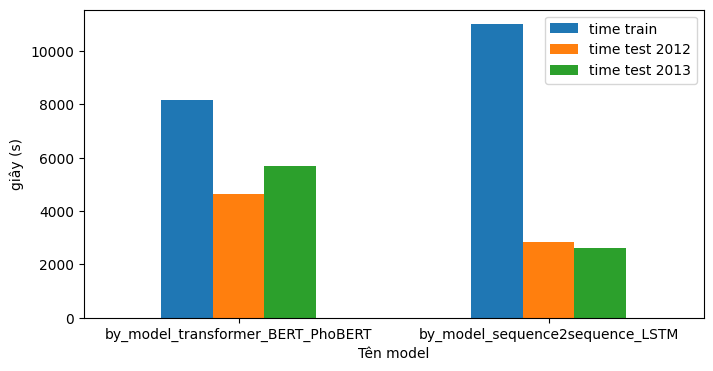

In [ ]:
df = pd.DataFrame(time, columns=['Tên model', 'time train', 'time test 2012', 'time test 2013'])
df = df.set_index('Tên model', drop= True)

df.plot(kind="bar", figsize=(8,4), ylabel = "giây (s)", rot=0)

# Vẽ biểu đồ đánh giá bleu score

<Axes: xlabel='Tên model', ylabel='score'>

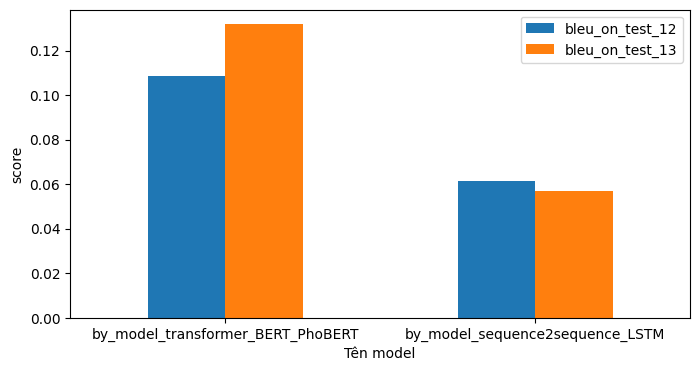

In [ ]:
df = pd.DataFrame(bleu, columns=['Tên model', 'bleu_on_test_12', 'bleu_on_test_13'])
df = df.set_index('Tên model', drop= True)

df.plot(kind="bar", figsize=(8,4), ylabel = "score", rot=0)

# Vẽ biểu đồ thể hiện loss khi train

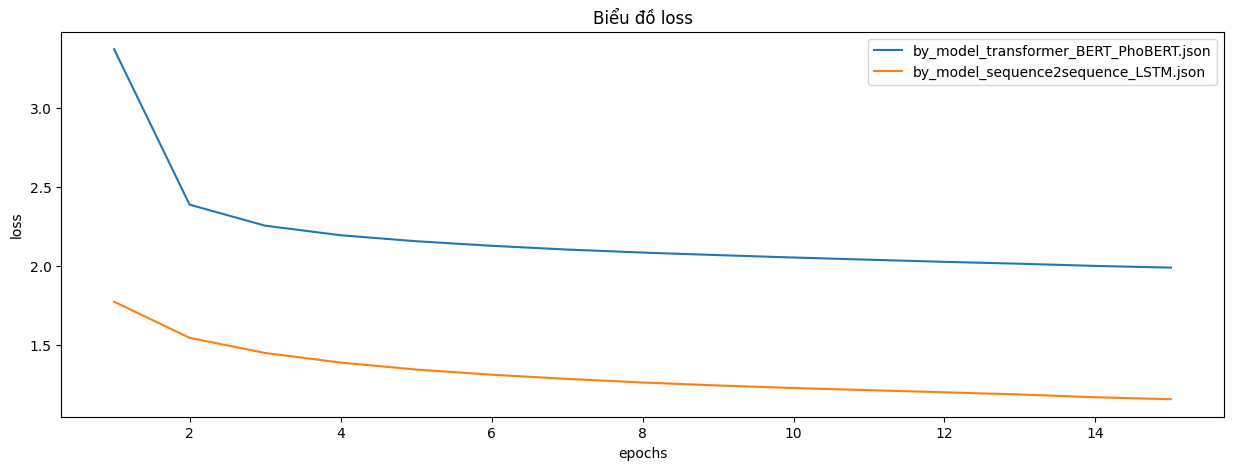

In [ ]:
plt.figure(figsize=(15,5))
for i in range(len(model_names)):
    plt.plot(range(1, 16), loss[i], label=model_names[i])

plt.title("Biểu đồ loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend(loc="best")